http://www.data-analysis-in-python.org/3_pandas.html


pandas introduces two new data structures to Python - Series and DataFrame, both of which are built on top of NumPy (this means it's fast).

#### Part 1: Intro to pandas data structures, covers the basics of the library's two main data structures - Series and DataFrames.

In [488]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_columns', 50)
%matplotlib inline

In [489]:
#create a Series with an arbitrary list
lst = ["1-0-0 char-word-func_LogisticRegression_cv_real_accuracy_mean", 0.6615157480314962, "LogisticRegression_cv_real_accuracy_var", 0.006677417290381456, "balanced_accuracy_mean", 0.6407544723878662, "balanced_accuracy_var", 0.007419682842323463, "precision_mean", 0.6492852723697509, "precision_var", 0.0043547275072768855, "recall_mean", 0.8542857142857143, "var", 0.007787755102040816, "f1_mean", 0.7350087620812211, "f1_var", 0.0037145063261670623, "roc_auc_mean", 0.7881941923774954, "var", 0.012534935701240119, "fake_accuracy_mean", 0.6615157480314962, "fake_accuracy_var", 0.006677417290381456]
series = pd.Series(lst)
print(series)

0     1-0-0 char-word-func_LogisticRegression_cv_rea...
1                                              0.661516
2               LogisticRegression_cv_real_accuracy_var
3                                            0.00667742
4                                balanced_accuracy_mean
5                                              0.640754
6                                 balanced_accuracy_var
7                                            0.00741968
8                                        precision_mean
9                                              0.649285
10                                        precision_var
11                                           0.00435473
12                                          recall_mean
13                                             0.854286
14                                                  var
15                                           0.00778776
16                                              f1_mean
17                                             0

In [490]:
Snd = ['Maaz',24, 'Height: 173 cm','Weight in kg:',78]
new_series = pd.Series(Snd)
print(new_series)

0              Maaz
1                24
2    Height: 173 cm
3     Weight in kg:
4                78
dtype: object


Alternatively, you can specify an index to use when creating the Series.

In [491]:
#create a Series with an arbitrary list
series = pd.Series(["1-0-0 char-word-func_LogisticRegression_cv_real_accuracy_mean", 0.661515748,
                    "LogisticRegression_cv_real_accuracy_var", 0.0066], 
                   index = ['A','B','C','D'])
print(series)

A    1-0-0 char-word-func_LogisticRegression_cv_rea...
B                                             0.661516
C              LogisticRegression_cv_real_accuracy_var
D                                               0.0066
dtype: object


The Series constructor can convert a dictonary as well, using the keys of the dictionary as its index

In [492]:
#In the dictionary form
clas = {"1-0-0 char-word-func_LogisticRegression_cv_real_accuracy_mean": 0.6615157480314962, 
        "LogisticRegression_cv_real_accuracy_var": 0.006677417290381456, 
        "balanced_accuracy_mean": 0.6407544723878662, "balanced_accuracy_var": 0.007419682842323463,
        "precision_mean": 0.6492852723697509, "precision_var": 0.0043547275072768855,
        "recall_mean": 0.8542857142857143, "var": 0.007787755102040816, 
        "f1_mean": 0.7350087620812211, "f1_var": 0.0037145063261670623, 
        "roc_auc_mean": 0.7881941923774954, "var": 0.012534935701240119, 
        "fake_accuracy_mean": 0.6615157480314962, "fake_accuracy_var": None}
S = pd.Series(clas)
print(S)

1-0-0 char-word-func_LogisticRegression_cv_real_accuracy_mean    0.661516
LogisticRegression_cv_real_accuracy_var                          0.006677
balanced_accuracy_mean                                           0.640754
balanced_accuracy_var                                            0.007420
precision_mean                                                   0.649285
precision_var                                                    0.004355
recall_mean                                                      0.854286
var                                                              0.012535
f1_mean                                                          0.735009
f1_var                                                           0.003715
roc_auc_mean                                                     0.788194
fake_accuracy_mean                                               0.661516
fake_accuracy_var                                                     NaN
dtype: float64


In [493]:
Send = {'Name': 'Maaz', 'Height': '173 cm','Weight in kg:': '78 kg'}
new_series = pd.Series(Send)
print(new_series)

Name               Maaz
Height           173 cm
Weight in kg:     78 kg
dtype: object


In [494]:
S['f1_mean']

0.7350087620812211

In [495]:
S[['f1_mean', 'f1_var']]

f1_mean    0.735009
f1_var     0.003715
dtype: float64

Or you can use boolean indexing for selection

In [496]:
#Shows only those in the series ('S') who has vales less than 0.70
S[S<0.70]

1-0-0 char-word-func_LogisticRegression_cv_real_accuracy_mean    0.661516
LogisticRegression_cv_real_accuracy_var                          0.006677
balanced_accuracy_mean                                           0.640754
balanced_accuracy_var                                            0.007420
precision_mean                                                   0.649285
precision_var                                                    0.004355
var                                                              0.012535
f1_var                                                           0.003715
fake_accuracy_mean                                               0.661516
dtype: float64

let's make it more clear - S < 0.70 returns a Series of True/False values, which we then pass to our Series S, returning the corresponding True items.

In [497]:
less_than_070 = S < 0.70
print(less_than_070)

print('\n')

print(S[less_than_070])

1-0-0 char-word-func_LogisticRegression_cv_real_accuracy_mean     True
LogisticRegression_cv_real_accuracy_var                           True
balanced_accuracy_mean                                            True
balanced_accuracy_var                                             True
precision_mean                                                    True
precision_var                                                     True
recall_mean                                                      False
var                                                               True
f1_mean                                                          False
f1_var                                                            True
roc_auc_mean                                                     False
fake_accuracy_mean                                                True
fake_accuracy_var                                                False
dtype: bool


1-0-0 char-word-func_LogisticRegression_cv_real_accuracy_mean  

You can also change the values in a Series on the fly

In [498]:
# changing based on the index
print('precision_mean:', S['precision_mean'])
S['precision_mean'] = 80
print('New value of precision_mean :', S['precision_mean'])

precision_mean: 0.6492852723697509
New value of precision_mean : 80.0


In [499]:
# changing values using boolean logic
print(S[S < 0.70])
print('\n')

S[S < 0.70] = 0.68

print (S[S < 0.70])

1-0-0 char-word-func_LogisticRegression_cv_real_accuracy_mean    0.661516
LogisticRegression_cv_real_accuracy_var                          0.006677
balanced_accuracy_mean                                           0.640754
balanced_accuracy_var                                            0.007420
precision_var                                                    0.004355
var                                                              0.012535
f1_var                                                           0.003715
fake_accuracy_mean                                               0.661516
dtype: float64


1-0-0 char-word-func_LogisticRegression_cv_real_accuracy_mean    0.68
LogisticRegression_cv_real_accuracy_var                          0.68
balanced_accuracy_mean                                           0.68
balanced_accuracy_var                                            0.68
precision_var                                                    0.68
var                                      

What if you aren't sure whether an item is in the Series? You can check using idiomatic Python.

In [500]:
print('Seattle' in S)
print('f1_var' in S)

False
True


Mathematical operations can be done using scalars and functions.

In [501]:
# divide city values by 3
S / 3

1-0-0 char-word-func_LogisticRegression_cv_real_accuracy_mean     0.226667
LogisticRegression_cv_real_accuracy_var                           0.226667
balanced_accuracy_mean                                            0.226667
balanced_accuracy_var                                             0.226667
precision_mean                                                   26.666667
precision_var                                                     0.226667
recall_mean                                                       0.284762
var                                                               0.226667
f1_mean                                                           0.245003
f1_var                                                            0.226667
roc_auc_mean                                                      0.262731
fake_accuracy_mean                                                0.226667
fake_accuracy_var                                                      NaN
dtype: float64

In [502]:
# square city values
np.square(S)

1-0-0 char-word-func_LogisticRegression_cv_real_accuracy_mean       0.462400
LogisticRegression_cv_real_accuracy_var                             0.462400
balanced_accuracy_mean                                              0.462400
balanced_accuracy_var                                               0.462400
precision_mean                                                   6400.000000
precision_var                                                       0.462400
recall_mean                                                         0.729804
var                                                                 0.462400
f1_mean                                                             0.540238
f1_var                                                              0.462400
roc_auc_mean                                                        0.621250
fake_accuracy_mean                                                  0.462400
fake_accuracy_var                                                        NaN

You can add two Series together, which returns a union of the two Series with the addition occurring on the shared index values. Values on either Series that did not appear in both series will produce a NULL/NaN (not a number).

In [503]:
print(S[['f1_mean', 'fake_accuracy_mean', 'roc_auc_mean ']])
print('\n')
print(S[['var', 'precision_var ']])
print('\n')
print(S[['f1_mean', 'fake_accuracy_mean', 'roc_auc_mean ']] + S[['f1_mean', 'precision_var ']])

f1_mean               0.735009
fake_accuracy_mean    0.680000
roc_auc_mean               NaN
dtype: float64


var               0.68
precision_var      NaN
dtype: float64


f1_mean               1.470018
fake_accuracy_mean         NaN
precision_var              NaN
roc_auc_mean               NaN
dtype: float64


D:\Anaconda\lib\site-packages\pandas\core\series.py:850: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Notice that because f1_mean found in both Series, it was returned with values. Others did not find in both series which gave NULL/NaN values.

Methematically speaking, value + nan = nan
for example, roc_auc_mean present in first series, and does not in second series.
So, in first series, it has value and in second series, it has nan
finally value + nan= nan

NULL checking can be performed with isnull and notnull.

In [504]:
# returns a boolean series indicating which values aren't NULL
S.notnull()

1-0-0 char-word-func_LogisticRegression_cv_real_accuracy_mean     True
LogisticRegression_cv_real_accuracy_var                           True
balanced_accuracy_mean                                            True
balanced_accuracy_var                                             True
precision_mean                                                    True
precision_var                                                     True
recall_mean                                                       True
var                                                               True
f1_mean                                                           True
f1_var                                                            True
roc_auc_mean                                                      True
fake_accuracy_mean                                                True
fake_accuracy_var                                                False
dtype: bool

In [505]:
# use boolean logic to grab the NULL in the series
print(S.isnull())
print('\n')

#Show which value in the series is null
print(S[S.isnull()])

1-0-0 char-word-func_LogisticRegression_cv_real_accuracy_mean    False
LogisticRegression_cv_real_accuracy_var                          False
balanced_accuracy_mean                                           False
balanced_accuracy_var                                            False
precision_mean                                                   False
precision_var                                                    False
recall_mean                                                      False
var                                                              False
f1_mean                                                          False
f1_var                                                           False
roc_auc_mean                                                     False
fake_accuracy_mean                                               False
fake_accuracy_var                                                 True
dtype: bool


fake_accuracy_var   NaN
dtype: float64


#### DataFrame


A DataFrame is a tablular data structure comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can also think of a DataFrame as a group of Series objects that share an index (the column names).

For the rest of the tutorial, we'll be primarily working with DataFrames.

#### Reading Data



To create a DataFrame out of common Python data structures, we can pass a dictionary of lists to the DataFrame constructor.

Using the columns parameter allows us to tell the constructor how we'd like the columns ordered. By default, the DataFrame constructor will order the columns alphabetically (though this isn't the case when reading from a file - more on that next).

###### Creating a data frame 

In [506]:
#lets say,Maaz participated in PAN competitions
data = {'year': [2015,2016,2017,2018,2019],
        'Teams':['Maaz_MIPT','Maaz_SK','Maaz_GCU','Maaz_CIC','Maaz_CIC-IPN'],
        'Win':  [0,1,0,1,1],
        'Loss': [1,1,3,0,0],
       'Played': [1,2,3,1,1]}
PAN = pd.DataFrame(data, columns = ['year','Teams','Win','Loss','Played'] )
PAN

,year,Teams,Win,Loss,Played
0,2015,Maaz_MIPT,0,1,1
1,2016,Maaz_SK,1,1,2
2,2017,Maaz_GCU,0,3,3
3,2018,Maaz_CIC,1,0,1
4,2019,Maaz_CIC-IPN,1,0,1


Much more often, you'll have a dataset you want to read into a DataFrame. Let's go through several common ways of doing so.

##### CSV

Reading a CSV is as simple as calling the read_csv function. By default, the read_csv function expects the column separator to be a comma, but you can change that using the sep parameter.

In [507]:
!head -n 5 New_mariano-rivera.csv

Year,Age,Time,League,Win,Loss,Win-Loss%
1995,25,morning,AL,5,3,0.625
1996,26,evening,AL,8,3,0.727
1997,27,morning,AL,6,4,0.6
1998,28,evening,AL,3,0,1


In [508]:
from_csv = pd.read_csv('New_mariano-rivera.csv')
from_csv.head(7)

,Year,Age,Time,League,Win,Loss,Win-Loss%
0,1995,25,morning,AL,5,3,0.625
1,1996,26,evening,AL,8,3,0.727
2,1997,27,morning,AL,6,4,0.600
3,1998,28,evening,AL,3,0,1.000
4,1999,29,after noon,AL,4,3,0.571
5,2000,30,morning,AL,7,4,0.636
6,2001,31,evening,AL,4,6,0.400


In [509]:
cols = ['num', 'game', 'date', 'team', 'home_away', 'opponent',
        'result', 'quarter', 'distance', 'receiver', ]
no_headers  = pd.read_csv('New_mariano-rivera.csv', sep=',', header=None,
                         names=cols)
no_headers.head()

,num,game,date,team,home_away,opponent,result,quarter,distance,receiver
0,Year,Age,Time,League,Win,Loss,Win-Loss%,NaN,NaN,NaN
1,1995,25,morning,AL,5,3,0.625,NaN,NaN,NaN
2,1996,26,evening,AL,8,3,0.727,NaN,NaN,NaN
3,1997,27,morning,AL,6,4,0.6,NaN,NaN,NaN
4,1998,28,evening,AL,3,0,1,NaN,NaN,NaN


##### Excel

Know who hates VBA? Me. I bet you do, too. Thankfully, pandas allows you to read and write Excel files, so you can easily read from Excel, write your code in Python, and then write back out to Excel - no need for VBA.

Reading Excel files requires the xlrd library. You can install it via pip (pip install xlrd).

Let's first write a DataFrame to Excel.

In [510]:
# this is the DataFrame we created from a dictionary earlier
PAN.head()

,year,Teams,Win,Loss,Played
0,2015,Maaz_MIPT,0,1,1
1,2016,Maaz_SK,1,1,2
2,2017,Maaz_GCU,0,3,3
3,2018,Maaz_CIC,1,0,1
4,2019,Maaz_CIC-IPN,1,0,1


In [511]:
# since our index on the PAN DataFrame is meaningless, let's not write it
PAN.to_excel('PAN.xlsx', index=False)
PAN.to_excel('PANS.xlsx') # it will generate indexs of the PAN file

In [512]:
!ls -l *.xlsx

-rw-r--r-- 1 Maaz Amjad 197121 5580 Apr 28 13:21 PAN.xlsx
-rw-r--r-- 1 Maaz Amjad 197121 5609 Apr 28 13:21 PANS.xlsx


In [513]:
# delete the DataFrame
del PAN

In [514]:
PAN
# it gives error because we already deleted PAN

NameError: name 'PAN' is not defined

In [515]:
# read from Excel
PAN = pd.read_excel('PAN.xlsx', 'Sheet1')
#if there are more than 1 sheets, then you can specify
#what sheet you want to open
#PAN = pd.read_excel('PAN.xlsx', 'Sheet1') 
PAN

,year,Teams,Win,Loss,Played
0,2015,Maaz_MIPT,0,1,1
1,2016,Maaz_SK,1,1,2
2,2017,Maaz_GCU,0,3,3
3,2018,Maaz_CIC,1,0,1
4,2019,Maaz_CIC-IPN,1,0,1


#### SQL Database

Pandas also has some support for reading/writing DataFrames directly from/to a database [docs]. You'll typically just need to pass a connection object or sqlalchemy engine to the read_sql or to_sql functions within the pandas.io module.

Note that to_sql executes as a series of INSERT INTO statements and thus trades speed for simplicity. If you're writing a large DataFrame to a database, it might be quicker to write the DataFrame to CSV and load that directly using the database's file import arguments.

In [516]:
# All of this is basically the same as it would be with Postgres, MySQL, or any other database
# Just pass pandas a connection object and it'll take care of the rest.
from pandas.io import sql
import sqlite3
conn = sqlite3.connect('towed.db')
query = "SELECT * FROM towed"
towed = sql.read_sql(query, con=conn, parse_dates={'date':'%m/%d/%Y'})
towed.head()

,date,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
0,2014-11-18,FORD,LL,,BLK,S105053,IL,10300 S. Doty,(773) 568-8495,2750424
1,2014-11-18,HOND,4D,ACC,BLK,S415270,IL,400 E. Lower Wacker,(312) 744-7550,917129
2,2014-11-18,CHRY,VN,,SIL,V847641,IL,701 N. Sacramento,(773) 265-7605,6798366
3,2014-11-18,HYUN,4D,,SIL,N756530,IL,400 E. Lower Wacker,(312) 744-7550,917127
4,2014-11-18,TOYT,4D,,WHI,K702211,IL,400 E. Lower Wacker,(312) 744-7550,917128


#### Clipboard



While the results of a query can be read directly into a DataFrame, I prefer to read the results directly from the clipboard. I'm often tweaking queries in my SQL client (Sequel Pro), so I would rather see the results before I read it into pandas. Once I'm confident I have the data I want, then I'll read it into a DataFrame.

This works just as well with any type of delimited data you've copied to your clipboard. The function does a good job of inferring the delimiter, but you can also use the sep parameter to be explicit.

Hank Aaron

In [517]:
hank = pd.read_clipboard()
hank.head()
# just go this website https://raw.github.com/gjreda/best-sandwiches/master/data/best-sandwiches-geocode.tsv,
#copy whole text and paste inside this cell and remove and run the cell


,",",inplace=True


#### JSON

In [518]:
js = pd.read_json('https://api.github.com/repos/pydata/pandas/issues?per_page=3')
js[['body', 'created_at', 'title', 'url']].head(3)

,body,created_at,title,url
0,```python\r\nIn [1]: import pandas as pd\r\n\r...,2019-04-28 16:53:17,pd.core.groupby.GroupBy docstrings missing end...,https://api.github.com/repos/pandas-dev/pandas...
1,- [x] closes #10355\r\n- [x] tests added / pas...,2019-04-27 22:37:59,"BUG: Fix #10355, std() groupby calculation",https://api.github.com/repos/pandas-dev/pandas...
2,- [ ] closes #xxxx\r\n- [x] tests added / pass...,2019-04-27 18:01:07,Fix .transform crash when SeriesGroupBy is em...,https://api.github.com/repos/pandas-dev/pandas...


You'll likely need to do some parsing though - pandas read_json doesn't do well with nested JSON yet

##### URL


With read_table, we can also read directly from a URL.

Let's use the best sandwiches data that I wrote about scraping a while back.

In [519]:
url = 'https://raw.github.com/gjreda/best-sandwiches/master/data/best-sandwiches-geocode.tsv'

# fetch the text from the URL and read it into a DataFrame
from_url = pd.read_table(url, sep='\t')
from_url.head(3)

,rank,sandwich,restaurant,description,price,address,city,phone,website,full_address,formatted_address,lat,lng
0,1,BLT,Old Oak Tap,The B is applewood smoked&mdash;nice and snapp...,$10,2109 W. Chicago Ave.,Chicago,773-772-0406,theoldoaktap.com,"2109 W. Chicago Ave., Chicago","2109 West Chicago Avenue, Chicago, IL 60622, USA",41.895734,-87.679960
1,2,Fried Bologna,Au Cheval,Thought your bologna-eating days had retired w...,$9,800 W. Randolph St.,Chicago,312-929-4580,aucheval.tumblr.com,"800 W. Randolph St., Chicago","800 West Randolph Street, Chicago, IL 60607, USA",41.884672,-87.647754
2,3,Woodland Mushroom,Xoco,Leave it to Rick Bayless and crew to come up w...,$9.50.,445 N. Clark St.,Chicago,312-334-3688,rickbayless.com,"445 N. Clark St., Chicago","445 North Clark Street, Chicago, IL 60654, USA",41.890602,-87.630925


Google Analytics
https://quantabee.wordpress.com/2012/12/17/google-analytics-pandas/

#### Part 2: Working with DataFrames, dives a bit deeper into the functionality of DataFrames. It shows how to inspect, select, filter, merge, combine, and group your data.

#### Working with DataFrames


Now that we can get data into a DataFrame, we can finally start working with them. pandas has an abundance of functionality, far too much for me to cover in this introduction. I'd encourage anyone interested in diving deeper into the library to check out its excellent documentation. Or just use Google - there are a lot of Stack Overflow questions and blog posts covering specifics of the library.

we will use two datasets

We'll be using the MovieLens dataset in many examples going forward. The dataset contains 100,000 ratings made by 943 users on 1,682 movies.
Read me: http://files.grouplens.org/datasets/movielens/ml-100k-README.txt


Second dataset is the results of our experiments.

In [520]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies_gen = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),encoding='latin-1')

#### Inspecting

pandas has a variety of functions for getting basic information about your DataFrame, the most basic of which is using the info method.

We've already been using `.head()`, but there's also `.tail()`. You can also use standard Python slicing. By default, head displays the first five records of the dataset, while tail displays the last five.

In [521]:
result =pd.read_csv('results.csv')
result.head()

,N-gram-feat-comb,char N-gram,word N-gram,func N-gram,total_feat_num,weightscheme,classifier,cv-acc,cv-balanced_acc,cv-roc,cv-f1-fake,acc,balanced_acc,roc,f1_fake,f1_real
0,1-0-0 char-word-func,1,0,0,101,binary,LogisticRegression,0.66,0.64,0.79,0.52,0.75,0.72,0.85,0.65,0.80
1,1-0-0 char-word-func,1,0,0,101,binary,LinearSVC,0.73,0.73,0.81,0.72,0.80,0.79,0.00,0.76,0.83
2,1-0-0 char-word-func,1,0,0,101,binary,SVC,0.67,0.64,0.79,0.46,0.77,0.75,0.00,0.68,0.82
3,1-0-0 char-word-func,1,0,0,101,binary,DecisionTreeClassifier,0.72,0.72,0.72,0.68,0.77,0.76,0.78,0.72,0.80
4,1-0-0 char-word-func,1,0,0,101,binary,RandomForestClassifier,0.65,0.61,0.80,0.32,0.72,0.68,0.89,0.52,0.80


In [522]:
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [523]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [524]:
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [525]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 5 columns):
movie_id              1682 non-null int64
title                 1682 non-null object
release_date          1681 non-null object
video_release_date    0 non-null float64
imdb_url              1679 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 65.8+ KB


In [526]:
result.info() # empty string showing up as non-null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 16 columns):
N-gram-feat-comb    2880 non-null object
char N-gram         2880 non-null int64
word N-gram         2880 non-null int64
func N-gram         2880 non-null int64
total_feat_num      2880 non-null int64
weightscheme        2880 non-null object
classifier          2880 non-null object
cv-acc              2880 non-null float64
cv-balanced_acc     2880 non-null float64
cv-roc              2880 non-null float64
cv-f1-fake          2880 non-null float64
acc                 2880 non-null float64
balanced_acc        2880 non-null float64
roc                 2880 non-null float64
f1_fake             2880 non-null float64
f1_real             2880 non-null float64
dtypes: float64(9), int64(4), object(3)
memory usage: 360.1+ KB


In [527]:
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


Notice user_id was included since it's numeric. Since this is an ID value, the stats for it don't really matter.

We can quickly see the average age of our users is just above 34 years old, with the youngest being 7 and the oldest being 73. The median age is 31, with the youngest quartile of users being 25 or younger, and the oldest quartile being at least 43.

In [528]:
movies.describe()

,movie_id,video_release_date
count,1682.000000,0.0
mean,841.500000,NaN
std,485.695893,NaN
min,1.000000,NaN
25%,421.250000,NaN
50%,841.500000,NaN
75%,1261.750000,NaN
max,1682.000000,NaN


In [529]:
ratings.describe()

,user_id,movie_id,rating,unix_timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [530]:
result.describe()  # basic stats for any numeric column

,char N-gram,word N-gram,func N-gram,total_feat_num,cv-acc,cv-balanced_acc,cv-roc,cv-f1-fake,acc,balanced_acc,roc,f1_fake,f1_real
count,2880.000000,2880.000000,2880.000000,2880.00000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000
mean,1.600000,1.600000,1.600000,9049.80000,0.484639,0.468149,0.554896,0.291660,0.661969,0.629722,0.563872,0.425931,0.741056
std,1.925605,1.925605,1.925605,11885.41162,0.436200,0.433719,0.460627,0.460304,0.088442,0.108911,0.339367,0.296325,0.071564
min,0.000000,0.000000,0.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,0.480000,0.490000,0.000000,0.000000,0.170000
25%,0.000000,0.000000,0.000000,922.75000,0.550000,0.500000,0.590000,0.010000,0.580000,0.510000,0.382500,0.070000,0.720000
50%,1.000000,1.000000,1.000000,4079.50000,0.580000,0.570000,0.670000,0.490000,0.640000,0.630000,0.710000,0.540000,0.730000
75%,3.000000,3.000000,3.000000,9027.00000,0.650000,0.640000,0.750000,0.620000,0.730000,0.720000,0.810000,0.680000,0.790000
max,6.000000,6.000000,6.000000,41125.00000,0.830000,0.830000,0.910000,0.820000,0.870000,0.870000,0.960000,0.850000,0.900000


In [531]:
result.tail(3)

,N-gram-feat-comb,char N-gram,word N-gram,func N-gram,total_feat_num,weightscheme,classifier,cv-acc,cv-balanced_acc,cv-roc,cv-f1-fake,acc,balanced_acc,roc,f1_fake,f1_real
2877,0-1-6 char-word-func,0,1,6,4038,none (tf),MultinomialNB,0.55,0.56,0.60,0.60,0.66,0.66,0.75,0.63,0.68
2878,0-1-6 char-word-func,0,1,6,4038,none (tf),BernoulliNB,0.56,0.58,0.67,0.62,0.68,0.70,0.80,0.69,0.66
2879,0-1-6 char-word-func,0,1,6,4038,none (tf),AdaBoostClassifier,0.66,0.66,0.73,0.63,0.66,0.65,0.73,0.57,0.72


Alternatively, Python's regular slicing syntax works as well.

In [532]:
result[21:23]

,N-gram-feat-comb,char N-gram,word N-gram,func N-gram,total_feat_num,weightscheme,classifier,cv-acc,cv-balanced_acc,cv-roc,cv-f1-fake,acc,balanced_acc,roc,f1_fake,f1_real
21,3-0-0 char-word-func,3,0,0,7927,binary,MultinomialNB,0.68,0.69,0.83,0.70,0.82,0.83,0.92,0.81,0.84
22,3-0-0 char-word-func,3,0,0,7927,binary,BernoulliNB,0.64,0.65,0.70,0.68,0.69,0.72,0.82,0.71,0.68


#### Selection

In [533]:
You can think of a DataFrame as a group of Series that share an index (in this case the column headers). This makes it easy to select specific columns.

Selecting a single column from the DataFrame will return a Series object.

SyntaxError: invalid syntax (<ipython-input-533-302b7c982215>, line 1)

In [536]:
result['classifier']

0           LogisticRegression
1                    LinearSVC
2                          SVC
3       DecisionTreeClassifier
4       RandomForestClassifier
5                MultinomialNB
6                  BernoulliNB
7           AdaBoostClassifier
8           LogisticRegression
9                    LinearSVC
10                         SVC
11      DecisionTreeClassifier
12      RandomForestClassifier
13               MultinomialNB
14                 BernoulliNB
15          AdaBoostClassifier
16          LogisticRegression
17                   LinearSVC
18                         SVC
19      DecisionTreeClassifier
20      RandomForestClassifier
21               MultinomialNB
22                 BernoulliNB
23          AdaBoostClassifier
24          LogisticRegression
25                   LinearSVC
26                         SVC
27      DecisionTreeClassifier
28      RandomForestClassifier
29               MultinomialNB
                 ...          
2850                       SVC
2851    

In [537]:
result['acc'].head()

0    0.75
1    0.80
2    0.77
3    0.77
4    0.72
Name: acc, dtype: float64

To select multiple columns, simply pass a list of column names to the DataFrame, the output of which will be a DataFrame.

In [538]:
result[['classifier','weightscheme']][:8]

,classifier,weightscheme
0,LogisticRegression,binary
1,LinearSVC,binary
2,SVC,binary
3,DecisionTreeClassifier,binary
4,RandomForestClassifier,binary
5,MultinomialNB,binary
6,BernoulliNB,binary
7,AdaBoostClassifier,binary


In [539]:
# can also store in a variable to use later
cols = [ 'cv-acc', 'acc'] # just passing a list
result[cols][:5]

,cv-acc,acc
0,0.66,0.75
1,0.73,0.80
2,0.67,0.77
3,0.72,0.77
4,0.65,0.72


Row selection can be done multiple ways, but doing so by an individual index or boolean indexing are typically easiest.

In [540]:
# accuracy less than 95
print(result[(result[['cv-acc','acc']] < 95)].head(10))

  N-gram-feat-comb  char N-gram  word N-gram  func N-gram  total_feat_num  \
0              NaN          NaN          NaN          NaN             NaN   
1              NaN          NaN          NaN          NaN             NaN   
2              NaN          NaN          NaN          NaN             NaN   
3              NaN          NaN          NaN          NaN             NaN   
4              NaN          NaN          NaN          NaN             NaN   
5              NaN          NaN          NaN          NaN             NaN   
6              NaN          NaN          NaN          NaN             NaN   
7              NaN          NaN          NaN          NaN             NaN   
8              NaN          NaN          NaN          NaN             NaN   
9              NaN          NaN          NaN          NaN             NaN   

  weightscheme classifier  cv-acc  cv-balanced_acc  cv-roc  cv-f1-fake   acc  \
0          NaN        NaN    0.66              NaN     NaN         NaN  

In [541]:
# classifiers having accuracy more than 75% AND weighting Scheme
print(result[(result.classifier == 'AdaBoostClassifier') &(result.weightscheme == 'binary') & (result.roc <95) ].head(10))


        N-gram-feat-comb  char N-gram  word N-gram  func N-gram  \
7   1-0-0 char-word-func            1            0            0   
15  2-0-0 char-word-func            2            0            0   
23  3-0-0 char-word-func            3            0            0   
31  4-0-0 char-word-func            4            0            0   
39  5-0-0 char-word-func            5            0            0   
47  6-0-0 char-word-func            6            0            0   
55  0-1-0 char-word-func            0            1            0   
63  0-2-0 char-word-func            0            2            0   
71  0-3-0 char-word-func            0            3            0   
79  0-4-0 char-word-func            0            4            0   

    total_feat_num weightscheme          classifier  cv-acc  cv-balanced_acc  \
7              101       binary  AdaBoostClassifier    0.70             0.69   
15            1555       binary  AdaBoostClassifier    0.81             0.80   
23            7927    

In [542]:
# Binary weighting Schemes who have f1_fake and f1_real score above 70
print(result[(result.weightscheme == 'binary')
             | (result.f1_fake > 70)
             | (result.f1_real > 70)].head(3))

       N-gram-feat-comb  char N-gram  word N-gram  func N-gram  \
0  1-0-0 char-word-func            1            0            0   
1  1-0-0 char-word-func            1            0            0   
2  1-0-0 char-word-func            1            0            0   

   total_feat_num weightscheme          classifier  cv-acc  cv-balanced_acc  \
0             101       binary  LogisticRegression    0.66             0.64   
1             101       binary           LinearSVC    0.73             0.73   
2             101       binary                 SVC    0.67             0.64   

   cv-roc  cv-f1-fake   acc  balanced_acc   roc  f1_fake  f1_real  
0    0.79        0.52  0.75          0.72  0.85     0.65     0.80  
1    0.81        0.72  0.80          0.79  0.00     0.76     0.83  
2    0.79        0.46  0.77          0.75  0.00     0.68     0.82  


Empty DataFrame
Columns: [N-gram-feat-comb, char N-gram, word N-gram, func N-gram, total_feat_num, weightscheme, classifier, cv-acc, cv-balanced_acc, cv-roc, cv-f1-fake, acc, balanced_acc, roc, f1_fake, f1_real]
Index: []


#### Indexes

Since our index is kind of meaningless right now, let's set it to the _userid using the set_index method. By default, set_index returns a new DataFrame, so you'll have to specify if you'd like the changes to occur in place.

This has confused me in the past, so look carefully at the code and output below.

In [548]:
print(users.set_index('user_id').head())
print('\n')

print(users.head())
print("\n^^^ I didn't actually change the DataFrame. ^^^\n")

with_new_index = users.set_index('user_id')
print(with_new_index.head())
print("\n^^^ set_index actually returns a new DataFrame. ^^^\n")

         age sex  occupation zip_code
user_id                              
1         24   M  technician    85711
2         53   F       other    94043
3         23   M      writer    32067
4         24   M  technician    43537
5         33   F       other    15213


   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213

^^^ I didn't actually change the DataFrame. ^^^

         age sex  occupation zip_code
user_id                              
1         24   M  technician    85711
2         53   F       other    94043
3         23   M      writer    32067
4         24   M  technician    43537
5         33   F       other    15213

^^^ set_index actually returns a new DataFrame. ^^^



If you want to modify your existing DataFrame, use the inplace parameter. Most DataFrame methods return new a DataFrames, while offering an inplace parameter. Note that the inplace version might not actually be any more efficint (in terms of speed or memory usage) that the regular version.

In [549]:
users.set_index('user_id', inplace=True)
users.head()

,age,sex,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


Notice that we've lost the default pandas 0-based index and moved the user_id into its place. We can select rows by position using the iloc method.

In [550]:
print(users.iloc[99])
print('\n')
print(users.iloc[[1, 50, 300]])

age                  36
sex                   M
occupation    executive
zip_code          90254
Name: 100, dtype: object


         age sex occupation zip_code
user_id                             
2         53   F      other    94043
51        28   M   educator    16509
301       24   M    student    55439


And we can select rows by label with the loc method.

In [551]:
print(users.loc[100])
print('\n')
print(users.loc[[2, 51, 301]])

age                  36
sex                   M
occupation    executive
zip_code          90254
Name: 100, dtype: object


         age sex occupation zip_code
user_id                             
2         53   F      other    94043
51        28   M   educator    16509
301       24   M    student    55439


If we realize later that we liked the old pandas default index, we can just reset_index. The same rules for inplace apply.

In [553]:
users.reset_index(inplace=True)
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


The simplified rules of indexing are

Use loc for label-based indexing
Use iloc for positional indexing
I've found that I can usually get by with boolean indexing, loc and iloc, but pandas has a whole host of other ways to do selection.

In [561]:
#Now, we can use any vlaue using indexing vlaues of N-gram-feat-comb
result.ix['1-0-0 char-word-func'].head(2)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,char N-gram,word N-gram,func N-gram,total_feat_num,weightscheme,classifier,cv-acc,cv-balanced_acc,cv-roc,cv-f1-fake,acc,balanced_acc,roc,f1_fake,f1_real
N-gram-feat-comb,,,,,,,,,,,,,,,
1-0-0 char-word-func,1,0,0,101,binary,LogisticRegression,0.66,0.64,0.79,0.52,0.75,0.72,0.85,0.65,0.80
1-0-0 char-word-func,1,0,0,101,binary,LinearSVC,0.73,0.73,0.81,0.72,0.80,0.79,0.00,0.76,0.83


In [562]:
 # get a value of a particular row
result.ix['1-0-0 char-word-func', 'cv-roc'][:2]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


N-gram-feat-comb
1-0-0 char-word-func    0.79
1-0-0 char-word-func    0.81
Name: cv-roc, dtype: float64

In [567]:
print(result.iloc[99])
print('\n')
print(result.iloc[1])
print('\n')
print(result.iloc[50])
print('\n')
print(result.iloc[300])
print('\n')
print(result.iloc[[1, 50, 300]])

char N-gram                             0
word N-gram                             0
func N-gram                             1
total_feat_num                        293
weightscheme                       binary
classifier         DecisionTreeClassifier
cv-acc                               0.53
cv-balanced_acc                      0.53
cv-roc                               0.53
cv-f1-fake                            0.5
acc                                  0.57
balanced_acc                         0.56
roc                                  0.56
f1_fake                               0.5
f1_real                              0.62
Name: 0-0-1 char-word-func, dtype: object


char N-gram                1
word N-gram                0
func N-gram                0
total_feat_num           101
weightscheme          binary
classifier         LinearSVC
cv-acc                  0.73
cv-balanced_acc         0.73
cv-roc                  0.81
cv-f1-fake              0.72
acc                      0.8
balance

A dataframe is a group of series as see below

In [217]:
type(result.ix['1-0-0 char-word-func', 'cv-roc'])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


pandas.core.series.Series

In [563]:
result.head(2)

,char N-gram,word N-gram,func N-gram,total_feat_num,weightscheme,classifier,cv-acc,cv-balanced_acc,cv-roc,cv-f1-fake,acc,balanced_acc,roc,f1_fake,f1_real
N-gram-feat-comb,,,,,,,,,,,,,,,
1-0-0 char-word-func,1,0,0,101,binary,LogisticRegression,0.66,0.64,0.79,0.52,0.75,0.72,0.85,0.65,0.80
1-0-0 char-word-func,1,0,0,101,binary,LinearSVC,0.73,0.73,0.81,0.72,0.80,0.79,0.00,0.76,0.83


In [239]:
result.reset_index(inplace=True)

#### Filtering

In [272]:
result[(result.classifier == 'AdaBoostClassifier') & (result.weightscheme == 'binary')]


,N-gram-feat-comb,char N-gram,word N-gram,func N-gram,total_feat_num,weightscheme,classifier,cv-acc,cv-balanced_acc,cv-roc,cv-f1-fake,acc,balanced_acc,roc,f1_fake,f1_real
7,1-0-0 char-word-func,1,0,0,101,binary,AdaBoostClassifier,0.70,0.69,0.76,0.67,0.78,0.77,0.90,0.73,0.82
15,2-0-0 char-word-func,2,0,0,1555,binary,AdaBoostClassifier,0.81,0.80,0.87,0.79,0.84,0.82,0.92,0.80,0.86
23,3-0-0 char-word-func,3,0,0,7927,binary,AdaBoostClassifier,0.77,0.76,0.84,0.73,0.83,0.82,0.90,0.78,0.86
31,4-0-0 char-word-func,4,0,0,20681,binary,AdaBoostClassifier,0.71,0.70,0.76,0.66,0.71,0.69,0.78,0.61,0.77
39,5-0-0 char-word-func,5,0,0,31926,binary,AdaBoostClassifier,0.68,0.68,0.74,0.65,0.70,0.69,0.77,0.65,0.74
47,6-0-0 char-word-func,6,0,0,37105,binary,AdaBoostClassifier,0.66,0.66,0.72,0.62,0.68,0.66,0.74,0.60,0.73
55,0-1-0 char-word-func,0,1,0,4020,binary,AdaBoostClassifier,0.66,0.66,0.74,0.62,0.73,0.72,0.83,0.68,0.77
63,0-2-0 char-word-func,0,2,0,6690,binary,AdaBoostClassifier,0.65,0.64,0.70,0.58,0.63,0.62,0.69,0.54,0.70
71,0-3-0 char-word-func,0,3,0,2860,binary,AdaBoostClassifier,0.64,0.63,0.66,0.54,0.58,0.57,0.63,0.51,0.63
79,0-4-0 char-word-func,0,4,0,847,binary,AdaBoostClassifier,0.65,0.63,0.65,0.50,0.59,0.54,0.58,0.32,0.71


In [220]:
result['N-gram-feat-comb'] == '1-0-0 char-word-func'

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2850    False
2851    False
2852    False
2853    False
2854    False
2855    False
2856    False
2857    False
2858    False
2859    False
2860    False
2861    False
2862    False
2863    False
2864    False
2865    False
2866    False
2867    False
2868    False
2869    False
2870    False
2871    False
2872    False
2873    False
2874    False
2875    False
2876    False
2877    False
2878    False
2879    False
Name: N-gram-feat-comb, Length: 2880, dtype: bool

In [221]:
(result['N-gram-feat-comb'] == '1-0-0 char-word-func').value_counts()

False    2832
True       48
Name: N-gram-feat-comb, dtype: int64

In [384]:
# SELECT *
# FROM towed
# WHERE date = '2014-11-04';
#result[result['N-gram-feat-comb'] == '1-0-0 char-word-func']

In [223]:
result.set_index('N-gram-feat-comb', inplace=True)

#### Selection

#### Filtering

In [385]:
# SELECT *
# FROM towed
# WHERE color = 'BLK'
#   AND state = 'MI';
#result[(result.classifier == 'AdaBoostClassifier')]

In [386]:
#result[result['classifier'] == 'AdaBoostClassifier'].sort_values(['cv-acc', 'acc'], ascending=False).head(100)

In [387]:
#result[(result.classifier == 'AdaBoostClassifier') | (result.weightscheme == 'binary')].sort_values(['cv-acc', 'acc'], ascending=[True, False]) # not red Porshe

In [388]:
#result[(result.classifier == 'AdaBoostClassifier') | (result.weightscheme == 'binary')].sort_values(['cv-acc', 'acc'], ascending=[True, False]) # not red Porshe

In [316]:
m = (result.classifier == 'AdaBoostClassifier') & (result.weightscheme == 'binary') # create a filter mask

In [317]:
m.value_counts() # it's just a boolean series

False    2820
True       60
dtype: int64

In [321]:
#SELECT make, model, color
# FROM towed
# WHERE style = '4D' AND state = 'IL
# ORDER BY date
# LIMIT 5;
result[m][['classifier', 'weightscheme', 'N-gram-feat-comb', 'cv-acc','acc', 'f1_real','f1_fake']].sort_values(['cv-acc', 'acc', 'f1_real','f1_fake'], ascending=[False, False,False,False]).head(100)

,classifier,weightscheme,N-gram-feat-comb,cv-acc,acc,f1_real,f1_fake
207,AdaBoostClassifier,binary,2-1-0 char-word-func,0.81,0.85,0.87,0.81
15,AdaBoostClassifier,binary,2-0-0 char-word-func,0.81,0.84,0.86,0.80
215,AdaBoostClassifier,binary,3-1-0 char-word-func,0.80,0.85,0.88,0.82
255,AdaBoostClassifier,binary,2-0-1 char-word-func,0.80,0.85,0.87,0.82
159,AdaBoostClassifier,binary,2-2-2 char-word-func,0.79,0.86,0.89,0.82
167,AdaBoostClassifier,binary,3-3-3 char-word-func,0.79,0.83,0.86,0.79
303,AdaBoostClassifier,binary,1-2-0 char-word-func,0.79,0.80,0.84,0.75
263,AdaBoostClassifier,binary,3-0-1 char-word-func,0.78,0.86,0.88,0.82
23,AdaBoostClassifier,binary,3-0-0 char-word-func,0.77,0.83,0.86,0.78
151,AdaBoostClassifier,binary,1-1-1 char-word-func,0.77,0.81,0.85,0.76


In [389]:
#result[result.duplicated()] # this would suck in SQL ... but that's also what primary keys are for

#### Joining

Throughout an analysis, we'll often need to merge/join datasets as data is typically stored in a relational manner.

Our MovieLens data is a good example of this - a rating requires both a user and a movie, and the datasets are linked together by a key - in this case, the user_id and movie_id. It's possible for a user to be associated with zero or many ratings and movies. Likewise, a movie can be rated zero or many times, by a number of different users.

Like SQL's JOIN clause, pandas.merge allows two DataFrames to be joined on one or more keys. The function provides a series of parameters (on, left_on, right_on, left_index, right_index) allowing you to specify the columns or indexes on which to join.

By default, pandas.merge operates as an inner join, which can be changed using the how parameter.

From the function's docstring:

how : {'left', 'right', 'outer', 'inner'}, default 'inner'

left: use only keys from left frame (SQL: left outer join)

right: use only keys from right frame (SQL: right outer join)

outer: use union of keys from both frames (SQL: full outer join)

inner: use intersection of keys from both frames (SQL: inner join)

Below are some examples of what each look like.

In [568]:
left_frame = pd.DataFrame({'key': range(5), 
                           'left_value': ['a', 'b', 'c', 'd', 'e']})
right_frame = pd.DataFrame({'key': range(2, 7), 
                           'right_value': ['f', 'g', 'h', 'i', 'j']})
print(left_frame)
print('\n')
print(right_frame)

   key left_value
0    0          a
1    1          b
2    2          c
3    3          d
4    4          e


   key right_value
0    2           f
1    3           g
2    4           h
3    5           i
4    6           j


### inner join (default)

In [571]:
# it will join only those index whch both dataframes contain (2,3,4 appears in both)
pd.merge(left_frame, right_frame, on='key', how='inner')

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h


We lose values from both frames since certain keys do not match up. The SQL equivalent is:

    SELECT left_frame.key, left_frame.left_value, right_frame.right_value
    FROM left_frame
    INNER JOIN right_frame
        ON left_frame.key = right_frame.key;
Had our key columns not been named the same, we could have used the left_on and right_on parameters to specify which fields to join from each frame.

pd.merge(left_frame, right_frame, left_on='left_key', right_on='right_key')

Alternatively, if our keys were indexes, we could use the left_index or right_index parameters, which accept a True/False value. You can mix and match columns and indexes like so:

pd.merge(left_frame, right_frame, left_on='key', right_index=True)

#### left outer join

In [574]:
# on='key' - it means that look and the key and put in two columns but in same 
# row if a key appreas in both
# how='left' means we keep everything from left frame but abstracting values from 
# right frame which has same index like in left frame
pd.merge(left_frame, right_frame, on='key', how='left')

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h


We keep everything from the left frame, pulling in the value from the right frame where the keys match up. The right_value is NULL where keys do not match (NaN).

SQL Equivalent:

SELECT left_frame.key, left_frame.left_value, right_frame.right_value
FROM left_frame
LEFT JOIN right_frame
    ON left_frame.key = right_frame.key;

#### right outer join

In [575]:
# on='key' - it means that look and the key and put in two columns but in same 
# row if a key appreas in both
# how='right' means we keep everything from right frame but abstracting values from 
# left frame which has same index like in right frame
pd.merge(left_frame, right_frame, on='key', how='right')

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h
3,5,NaN,i
4,6,NaN,j


This time we've kept everything from the right frame with the left_value being NULL where the right frame's key did not find a match.

SQL Equivalent:

SELECT right_frame.key, left_frame.left_value, right_frame.right_value
FROM left_frame
RIGHT JOIN right_frame
    ON left_frame.key = right_frame.key;

#### full outer join

In [576]:
# on='key' - it means that look and the key and put in two columns but in same 
# row if a key appreas in both
# how='outer' means we keep everything from right frame and from left frame
pd.merge(left_frame, right_frame, on='key', how='outer')

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h
5,5,NaN,i
6,6,NaN,j


We've kept everything from both frames, regardless of whether or not there was a match on both sides. Where there was not a match, the values corresponding to that key are NULL.

SQL Equivalent (though some databases don't allow FULL JOINs (e.g. MySQL)):

SELECT IFNULL(left_frame.key, right_frame.key) key
        , left_frame.left_value, right_frame.right_value
FROM left_frame
FULL OUTER JOIN right_frame
    ON left_frame.key = right_frame.key;

#### Combining

Pandas also provides a way to combine DataFrames along an axis - pandas.concat. While the function is equivalent to SQL's UNION clause, there's a lot more that can be done with it.

pandas.concat takes a list of Series or DataFrames and returns a Series or DataFrame of the concatenated objects. Note that because the function takes list, you can combine many objects at once.

In [577]:
pd.concat([left_frame, right_frame])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,NaN
3,3,d,NaN
4,4,e,NaN
0,2,NaN,f
1,3,NaN,g
2,4,NaN,h
3,5,NaN,i
4,6,NaN,j


By default, the function will vertically append the objects to one another, combining columns with the same name. We can see above that values not matching up will be NULL.

Additionally, objects can be concatentated side-by-side using the function's axis parameter.

In [578]:
pd.concat([left_frame, right_frame], axis=1)

,key,left_value,key,right_value
0,0,a,2,f
1,1,b,3,g
2,2,c,4,h
3,3,d,5,i
4,4,e,6,j


pandas.concat can be used in a variety of ways; however, I've typically only used it to combine Series/DataFrames into one unified object. The documentation has some examples on the ways it can be used.

![joins](http://upload.wikimedia.org/wikipedia/commons/9/9d/SQL_Joins.svg)

#### LEFT JOIN

In [322]:
# CREATE TABLE divvy (
#   SELECT *
#   FROM trips
#   LEFT JOIN stations
#     ON trips.from_station_name = stations.name
# );
divvy = pd.merge(trips, stations, how='left', left_on='from_station_name', right_on='name')
divvy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759788 entries, 0 to 759787
Data columns (total 16 columns):
trip_id              759788 non-null int64
starttime            759788 non-null datetime64[ns]
stoptime             759788 non-null datetime64[ns]
bikeid               759788 non-null int64
tripduration         759788 non-null int64
from_station_id      758826 non-null float64
from_station_name    759788 non-null object
to_station_id        758829 non-null float64
to_station_name      759788 non-null object
usertype             759788 non-null object
gender               403046 non-null object
birthyear            402909 non-null float64
name                 759788 non-null object
latitude             759788 non-null float64
longitude            759788 non-null float64
dpcapacity           759788 non-null int64
dtypes: datetime64[ns](2), float64(5), int64(4), object(5)
memory usage: 98.5+ MB


In [323]:
# SELECT trip_id, ... divvy.name AS name_origin ... stations.name AS name_dest
# FROM divvy
# INNER JOIN stations
#   ON divvy.to_station_name = stations.name
divvy = pd.merge(divvy, stations, how='inner', left_on='to_station_name', right_on='name', suffixes=['_origin', '_dest'])
divvy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759788 entries, 0 to 759787
Data columns (total 20 columns):
trip_id              759788 non-null int64
starttime            759788 non-null datetime64[ns]
stoptime             759788 non-null datetime64[ns]
bikeid               759788 non-null int64
tripduration         759788 non-null int64
from_station_id      758826 non-null float64
from_station_name    759788 non-null object
to_station_id        758829 non-null float64
to_station_name      759788 non-null object
usertype             759788 non-null object
gender               403046 non-null object
birthyear            402909 non-null float64
name_origin          759788 non-null object
latitude_origin      759788 non-null float64
longitude_origin     759788 non-null float64
dpcapacity_origin    759788 non-null int64
name_dest            759788 non-null object
latitude_dest        759788 non-null float64
longitude_dest       759788 non-null float64
dpcapacity_dest      759788 non-nu

#### UNION & UNION ALL (concatenation)

In [326]:
df1 = pd.DataFrame({'a': np.random.randn(3), 'b': np.square(range(100,103))})
df2 = pd.DataFrame({'a': [np.NaN, 11, 99], 'b': np.random.randn(3)})
df3 = pd.DataFrame({'a': [np.NaN, 11, 99], 'c': np.random.randn(3)})

In [328]:
# SELECT a, b
# FROM df1
# UNION
# SELECT a, b
# FROM df2;

# takes a list, so you can pass 2+ dataframes
# note that the indexes are the same
pd.concat([df1, df2, df3])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  if __name__ == '__main__':


,a,b,c
0,1.206058,10000.000000,NaN
1,0.351809,10201.000000,NaN
2,0.497389,10404.000000,NaN
0,NaN,-0.286236,NaN
1,11.000000,1.107231,NaN
2,99.000000,0.583413,NaN
0,NaN,NaN,1.280245
1,11.000000,NaN,0.453384
2,99.000000,NaN,0.471459


### No Looping!
#### Vectorizing functions with `.apply`
![vectorize-all-the-things](http://i.imgur.com/nOBXSWb.jpg)

### Grouping

pandas `groupby` draws largely from Hadley Wickham's [Split Apply Combine Methodology for Data Analysis](http://www.jstatsoft.org/v40/i01/paper) (it's a good paper; you should read it).

![split-apply-combine-methodology](http://nbviewer.ipython.org/github/umddb/datascience-fall14/blob/master/lab3/img/splitApplyCombine.png)

Grouping in pandas took some time for me to grasp, but it's pretty awesome once it clicks.

pandas groupby method draws largely from the split-apply-combine strategy for data analysis. If you're not familiar with this methodology, I highly suggest you read up on it. It does a great job of illustrating how to properly think through a data problem, which I feel is more important than any technical skill a data analyst/scientist can possess.

When approaching a data analysis problem, you'll often break it apart into manageable pieces, perform some operations on each of the pieces, and then put everything back together again (this is the gist split-apply-combine strategy). pandas groupby is great for these problems (R users should check out the plyr and dplyr packages).

If you've ever used SQL's GROUP BY or an Excel Pivot Table, you've thought with this mindset, probably without realizing it.

Assume we have a DataFrame and want to get the average for each group - visually, the split-apply-combine method looks like this:

The City of Chicago is kind enough to publish all city employee salaries to its open data portal. Let's go through some basic groupby examples using this data.

In [581]:
!head -n 3 city-of-chicago-salaries.csv

Name,Position Title,Department,Employee Annual Salary
"AARON,  ELVIA J",WATER RATE TAKER,WATER MGMNT,$85512.00
"AARON,  JEFFERY M",POLICE OFFICER,POLICE,$75372.00


Since the data contains a dollar sign for each salary, python will treat the field as a series of strings. We can use the converters parameter to change this when reading in the file.

converters : dict. optional

Dict of functions for converting values in certain columns. Keys can either be integers or column labels

In [582]:
headers = ['name', 'title', 'department', 'salary']
chicago = pd.read_csv('city-of-chicago-salaries.csv', 
                      header=0,
                      names=headers,
                      converters={'salary': lambda x: float(x.replace('$', ''))})
chicago.head()

,name,title,department,salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,85512.0
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,75372.0
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,80916.0
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,99648.0
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,89440.0


pandas groupby returns a DataFrameGroupBy object which has a variety of methods, many of which are similar to standard SQL aggregate functions.

In [584]:
by_dept = chicago.groupby('department')
by_dept

Calling count returns the total number of NOT NULL values within each column. If we were interested in the total number of records in each group, we could use size.

In [585]:
print(by_dept.count().head()) # NOT NULL records within each column
print('\n')
print(by_dept.size().tail()) # total records for each department

                   name  title  salary
department                            
ADMIN HEARNG         42     42      42
ANIMAL CONTRL        61     61      61
AVIATION           1218   1218    1218
BOARD OF ELECTION   110    110     110
BOARD OF ETHICS       9      9       9


department
PUBLIC LIBRARY     926
STREETS & SAN     2070
TRANSPORTN        1168
TREASURER           25
WATER MGMNT       1857
dtype: int64


Summation can be done via sum, averaging by mean, etc. (if it's a SQL function, chances are it exists in pandas). Oh, and there's median too, something not available in most databases.

In [586]:
print(by_dept.sum()[20:25]) # total salaries of each department
print('\n')
print(by_dept.mean()[20:25]) # average salary of each department
print('\n')
print(by_dept.median()[20:25]) # take that, RDBMS!

                       salary
department                   
HUMAN RESOURCES     4850928.0
INSPECTOR GEN       4035150.0
IPRA                7006128.0
LAW                31883920.2
LICENSE APPL COMM     65436.0


                         salary
department                     
HUMAN RESOURCES    71337.176471
INSPECTOR GEN      80703.000000
IPRA               82425.035294
LAW                70853.156000
LICENSE APPL COMM  65436.000000


                    salary
department                
HUMAN RESOURCES    68496.0
INSPECTOR GEN      76116.0
IPRA               82524.0
LAW                66492.0
LICENSE APPL COMM  65436.0


Operations can also be done on an individual Series within a grouped object. Say we were curious about the five departments with the most distinct titles - the pandas equivalent to:

SELECT department, COUNT(DISTINCT title)
FROM chicago
GROUP BY department
ORDER BY 2 DESC
LIMIT 5;

pandas is a lot less verbose here ...

In [587]:
by_dept.title.nunique().sort_values(ascending=False)[:5]

department
WATER MGMNT    153
TRANSPORTN     150
POLICE         130
AVIATION       125
HEALTH         118
Name: title, dtype: int64

In [580]:
!head -n 3 results.csv

N-gram-feat-comb,char N-gram,word N-gram,func N-gram,total_feat_num,weightscheme,classifier,cv-acc,cv-balanced_acc,cv-roc,cv-f1-fake,acc,balanced_acc,roc,f1_fake,f1_real
1-0-0 char-word-func,1,0,0,101,binary,LogisticRegression,0.66,0.64,0.79,0.52,0.75,0.72,0.85,0.65,0.8
1-0-0 char-word-func,1,0,0,101,binary,LinearSVC,0.73,0.73,0.81,0.72,0.8,0.79,0,0.76,0.83


In [583]:
headers = ['N-gram-feat-comb', 'classifier', 'weightscheme', 'f1_fake','f1_real']
resultss = pd.read_csv('results.csv', 
                      header=0,
                      names=headers,)
resultss.head()

N-gram-feat-comb  \
1-0-0 char-word-func 1 0 0 101 binary LogisticRegression     0.66 0.64 0.79 0.52              0.75   
                                      LinearSVC              0.73 0.73 0.81 0.72              0.80   
                                      SVC                    0.67 0.64 0.79 0.46              0.77   
                                      DecisionTreeClassifier 0.72 0.72 0.72 0.68              0.77   
                                      RandomForestClassifier 0.65 0.61 0.80 0.32              0.72   

                                                                                  classifier  \
1-0-0 char-word-func 1 0 0 101 binary LogisticRegression     0.66 0.64 0.79 0.52        0.72   
                                      LinearSVC              0.73 0.73 0.81 0.72        0.79   
                                      SVC                    0.67 0.64 0.79 0.46        0.75   
                                      DecisionTreeClassifier 0.72 0.72 0.72 0.68        0.76   
                                      RandomForestClassifier 0.65 0.61 0.80 0.32        0.68   

                                                                                  weightscheme  \
1-0-0 char-word-func 1 0 0 101 binary LogisticRegression     0.66 0.64 0.79 0.52          0.85   
                                      LinearSVC              0.73 0.73 0.81 0.72          0.00   
                                      SVC                    0.67 0.64 0.79 0.46          0.00   
                                      DecisionTreeClassifier 0.72 0.72 0.72 0.68          0.78   
                                      RandomForestClassifier 0.65 0.61 0.80 0.32          0.89   

                                                                                  f1_fake  \
1-0-0 char-word-func 1 0 0 101 binary LogisticRegression     0.66 0.64 0.79 0.52     0.65   
                                      LinearSVC              0.73 0.73 0.81 0.72     0.76   
                                      SVC                    0.67 0.64 0.79 0.46     0.68   
                                      DecisionTreeClassifier 0.72 0.72 0.72 0.68     0.72   
                                      RandomForestClassifier 0.65 0.61 0.80 0.32     0.52   

                                                                                  f1_real  
1-0-0 char-word-func 1 0 0 101 binary LogisticRegression     0.66 0.64 0.79 0.52     0.80  
                                      LinearSVC              0.73 0.73 0.81 0.72     0.83  
                                      SVC                    0.67 0.64 0.79 0.46     0.82  
                                      DecisionTreeClassifier 0.72 0.72 0.72 0.68     0.80  
                                      RandomForestClassifier 0.65 0.61 0.80 0.32     0.80

#### split-apply-combine

The real power of groupby comes from it's split-apply-combine ability.

What if we wanted to see the highest paid employee within each department. Given our current dataset, we'd have to do something like this in SQL:

SELECT *
FROM chicago c
INNER JOIN (
    SELECT department, max(salary) max_salary
    FROM chicago
    GROUP BY department
) m
ON c.department = m.department
AND c.salary = m.max_salary;

This would give you the highest paid person in each department, but it would return multiple if there were many equally high paid people within a department.

Alternatively, you could alter the table, add a column, and then write an update statement to populate that column. However, that's not always an option.

Note: This would be a lot easier in PostgreSQL, T-SQL, and possibly Oracle due to the existence of partition/window/analytic functions. I've chosen to use MySQL syntax throughout this tutorial because of it's popularity. Unfortunately, MySQL doesn't have similar functions.

Using groupby we can define a function (which we'll call ranker) that will label each record from 1 to N, where N is the number of employees within the department. We can then call apply to, well, apply that function to each group (in this case, each department).

In [588]:
def ranker(df):
    """Assigns a rank to each employee based on salary, with 1 being the highest paid.
    Assumes the data is DESC sorted."""
    df['dept_rank'] = np.arange(len(df)) + 1
    return df

In [589]:
chicago.sort_values('salary', ascending=False, inplace=True)
chicago = chicago.groupby('department').apply(ranker)
print(chicago[chicago.dept_rank == 1].head(7))

                         name                     title      department  \
18039     MC CARTHY,  GARRY F  SUPERINTENDENT OF POLICE          POLICE   
8004           EMANUEL,  RAHM                     MAYOR  MAYOR'S OFFICE   
25588       SANTIAGO,  JOSE A         FIRE COMMISSIONER            FIRE   
763    ANDOLINO,  ROSEMARIE S  COMMISSIONER OF AVIATION        AVIATION   
4697     CHOUCAIR,  BECHARA N    COMMISSIONER OF HEALTH          HEALTH   
21971      PATTON,  STEPHEN R       CORPORATION COUNSEL             LAW   
12635      HOLT,  ALEXANDRA D                BUDGET DIR   BUDGET & MGMT   

         salary  dept_rank  
18039  260004.0          1  
8004   216210.0          1  
25588  202728.0          1  
763    186576.0          1  
4697   177156.0          1  
21971  173664.0          1  
12635  169992.0          1  


In [593]:
chicago[chicago.department == "LAW"][:5]

,name,title,department,salary,dept_rank
21971,"PATTON, STEPHEN R",CORPORATION COUNSEL,LAW,173664.0,1
6311,"DARLING, LESLIE M",FIRST ASST CORPORATION COUNSEL,LAW,149160.0,2
17680,"MARTINICO, JOSEPH P",CHIEF LABOR NEGOTIATOR,LAW,144036.0,3
22357,"PETERS, LYNDA A",CITY PROSECUTOR,LAW,139932.0,4
31383,"WONG JR, EDWARD J",DEPUTY CORPORATION COUNSEL,LAW,137076.0,5


We can now see where each employee ranks within their department based on salary.

### Using pandas on the MovieLens dataset and our experiments results

To show pandas in a more "applied" sense, let's use it to answer some questions about the MovieLens dataset. Recall that we've already read our data into DataFrames and merged it.

In [594]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

# create one merged DataFrame
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

In [596]:
result =pd.read_csv('results.csv')
result.head(3)

,N-gram-feat-comb,char N-gram,word N-gram,func N-gram,total_feat_num,weightscheme,classifier,cv-acc,cv-balanced_acc,cv-roc,cv-f1-fake,acc,balanced_acc,roc,f1_fake,f1_real
0,1-0-0 char-word-func,1,0,0,101,binary,LogisticRegression,0.66,0.64,0.79,0.52,0.75,0.72,0.85,0.65,0.80
1,1-0-0 char-word-func,1,0,0,101,binary,LinearSVC,0.73,0.73,0.81,0.72,0.80,0.79,0.00,0.76,0.83
2,1-0-0 char-word-func,1,0,0,101,binary,SVC,0.67,0.64,0.79,0.46,0.77,0.75,0.00,0.68,0.82


What are the 25 most rated movies?

In [599]:
most_rated = lens.groupby('title').size().sort_values(ascending=False)[:25]
most_rated

title
Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to the Fu

There's a lot going on in the code above, but it's very idomatic. We're splitting the DataFrame into groups by movie title and applying the size method to get the count of records in each group. Then we order our results in descending order and limit the output to the top 25 using Python's slicing syntax.

In SQL, this would be equivalent to:

SELECT title, count(1)
FROM lens
GROUP BY title
ORDER BY 2 DESC
LIMIT 25;

Alternatively, pandas has a nifty value_counts method - yes, this is simpler - the goal above was to show a basic groupby example.

In [618]:
lens.title.value_counts()[:25]

Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to the Future (

Which movies are most highly rated?

In [625]:
movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

We can use the agg method to pass a dictionary specifying the columns to aggregate (as keys) and a list of functions we'd like to apply.

Let's sort the resulting DataFrame so that we can see which movies have the highest average score.

In [626]:
# sort by rating average
movie_stats.sort_values([('rating', 'mean')], ascending=False).head()

rating     
                                             size mean
title                                                 
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

Because movie_stats is a DataFrame, we use the sort method - only Series objects use order. Additionally, because our columns are now a MultiIndex, we need to pass in a tuple specifying how to sort.

The above movies are rated so rarely that we can't count them as quality films. Let's only look at movies that have been rated at least 100 times.

In [627]:
atleast_100 = movie_stats['rating']['size'] >= 100
movie_stats[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:15]

rating          
                                         size      mean
title                                                  
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

Limiting our population going forward

Going forward, let's only look at the 50 most rated movies. Let's make a Series of movies that meet this threshold so we can use it for filtering later.

In [631]:
most_50 = lens.groupby('movie_id').size().sort_values(ascending=False)[:50]

Which movies are most controversial amongst different ages?

Let's look at how these movies are viewed across different age groups. First, let's look at how age is distributed amongst our users.

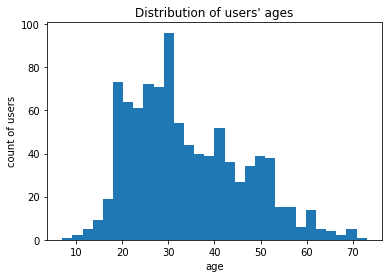

In [632]:
users.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

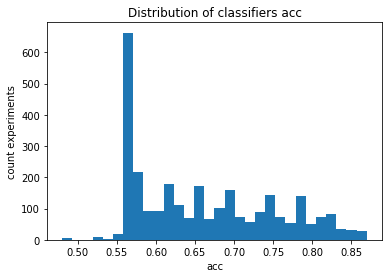

In [635]:
result.acc.plot.hist(bins=30)
plt.title("Distribution of classifiers acc")
plt.ylabel('count experiments')
plt.xlabel('acc');

pandas' integration with matplotlib makes basic graphing of Series/DataFrames trivial. In this case, just call hist on the column to produce a histogram. We can also use matplotlib.pyplot to customize our graph a bit (always label your axes).

Binning our users

I don't think it'd be very useful to compare individual ages - let's bin our users into age groups using pandas.cut.

In [638]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
lens[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,60,60-69
397,21,20-29
459,33,30-39
524,30,30-39
782,23,20-29
995,29,20-29
1229,26,20-29
1664,31,30-39
1942,24,20-29
2270,32,30-39


pandas.cut allows you to bin numeric data. In the above lines, we first created labels to name our bins, then split our users into eight bins of ten years (0-9, 10-19, 20-29, etc.). Our use of right=False told the function that we wanted the bins to be exclusive of the max age in the bin (e.g. a 30 year old user gets the 30s label).

Now we can now compare ratings across age groups.

In [654]:
lens.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

Young users seem a bit more critical than other age groups. Let's look at how the 50 most rated movies are viewed across each age group. We can use the most_50 Series we created earlier for filtering.

In [656]:
lens.set_index('movie_id', inplace=True)

In [657]:
by_age = lens.loc[most_50.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(15)

title                 age_group
Air Force One (1997)  10-19        3.647059
                      20-29        3.666667
                      30-39        3.570000
                      40-49        3.555556
                      50-59        3.750000
                      60-69        3.666667
                      70-79        3.666667
Alien (1979)          10-19        4.111111
                      20-29        4.026087
                      30-39        4.103448
                      40-49        3.833333
                      50-59        4.272727
                      60-69        3.500000
                      70-79        4.000000
Aliens (1986)         10-19        4.050000
Name: rating, dtype: float64

In [617]:
most_good = result.groupby(['f1_real','f1_fake']).size().sort_values(ascending=False).head(30)
most_good

f1_real  f1_fake
0.73     0.00       574
         0.05        41
         0.02        41
         0.08        38
         0.04        36
0.74     0.09        29
0.68     0.71        24
0.74     0.07        23
0.83     0.76        20
0.82     0.73        19
0.60     0.65        18
0.83     0.75        18
0.59     0.65        18
0.82     0.75        18
0.66     0.69        18
0.84     0.76        18
0.82     0.72        17
0.85     0.78        17
0.87     0.81        16
0.74     0.15        15
0.86     0.79        15
0.74     0.13        15
0.72     0.59        14
0.80     0.52        14
0.74     0.10        14
0.84     0.75        14
0.85     0.77        13
0.84     0.78        13
0.67     0.71        13
0.74     0.12        13
dtype: int64

Notice that both the title and age group are indexes here, with the average rating value being a Series. This is going to produce a really long list of values.

Wouldn't it be nice to see the data as a table? Each title as a row, each age group as a column, and the average rating in each cell.

Behold! The magic of unstack!

In [658]:
by_age.rating.mean().unstack(1).fillna(0)[10:20]

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
E.T. the Extra-Terrestrial (1982),0.0,3.680000,3.609091,3.806818,4.160000,4.368421,4.375000,0.000000
"Empire Strikes Back, The (1980)",4.0,4.642857,4.311688,4.052083,4.100000,3.909091,4.250000,5.000000
"English Patient, The (1996)",5.0,3.739130,3.571429,3.621849,3.634615,3.774648,3.904762,4.500000
Fargo (1996),0.0,3.937500,4.010471,4.230769,4.294118,4.442308,4.000000,4.333333
Forrest Gump (1994),5.0,4.047619,3.785714,3.861702,3.847826,4.000000,3.800000,0.000000
"Fugitive, The (1993)",0.0,4.320000,3.969925,3.981481,4.190476,4.240000,3.666667,0.000000
"Full Monty, The (1997)",0.0,3.421053,4.056818,3.933333,3.714286,4.146341,4.166667,3.500000
"Godfather, The (1972)",0.0,4.400000,4.345070,4.412844,3.929412,4.463415,4.125000,0.000000
Groundhog Day (1993),0.0,3.476190,3.798246,3.786667,3.851064,3.571429,3.571429,4.000000


unstack, well, unstacks the specified level of a MultiIndex (by default, groupby turns the grouped field into an index - since we grouped by two fields, it became a MultiIndex). We unstacked the second index (remember that Python uses 0-based indexes), and then filled in NULL values with 0.

If we would have used: We would have had our age groups as rows and movie titles as columns.

In [659]:
by_age.rating.mean().unstack(0).fillna(0)

title,Air Force One (1997),Alien (1979),Aliens (1986),Apollo 13 (1995),Back to the Future (1985),"Birdcage, The (1996)",Braveheart (1995),Conspiracy Theory (1997),Contact (1997),Dead Man Walking (1995),E.T. the Extra-Terrestrial (1982),"Empire Strikes Back, The (1980)","English Patient, The (1996)",Fargo (1996),Forrest Gump (1994),"Fugitive, The (1993)","Full Monty, The (1997)","Godfather, The (1972)",Groundhog Day (1993),Independence Day (ID4) (1996),Indiana Jones and the Last Crusade (1989),Jaws (1975),Jerry Maguire (1996),L.A. Confidential (1997),Leaving Las Vegas (1995),Liar Liar (1997),Men in Black (1997),Mission: Impossible (1996),Monty Python and the Holy Grail (1974),Mr. Holland's Opus (1995),"Princess Bride, The (1987)",Pulp Fiction (1994),Raiders of the Lost Ark (1981),Return of the Jedi (1983),"Rock, The (1996)","Saint, The (1997)",Schindler's List (1993),Scream (1996),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Trek: First Contact (1996),Star Wars (1977),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),Twelve Monkeys (1995),Twister (1996),When Harry Met Sally... (1989),Willy Wonka and the Chocolate Factory (1971)
age_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0-9,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,4.000000,5.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,5.000000,0.000000,4.000000,0.000000,0.000000,0.000000
10-19,3.647059,4.111111,4.050000,3.954545,4.037037,3.217391,4.384615,3.565217,3.693878,3.647059,3.680000,4.642857,3.739130,3.937500,4.047619,4.320000,3.421053,4.400000,3.476190,3.595238,4.130435,3.863636,3.928571,4.363636,4.000000,3.191489,3.900000,3.441176,4.285714,3.814815,4.214286,4.031250,4.250000,4.488372,4.058824,3.342857,4.26087,3.784615,4.666667,4.095238,3.576923,4.630435,4.173913,3.619048,4.611111,3.621622,3.916667,3.000000,3.500000,3.387097
20-29,3.666667,4.026087,4.087719,3.845455,3.720588,3.413223,4.194915,3.382114,3.785714,3.926606,3.609091,4.311688,3.571429,4.010471,3.785714,3.969925,4.056818,4.345070,3.798246,3.291429,3.944056,3.870000,3.793548,4.096154,3.773913,3.321244,3.705426,3.378378,4.154412,3.849057,4.335714,4.197605,4.269939,4.067308,3.690476,3.179688,4.46789,3.669767,4.585366,4.434211,3.641975,4.413043,3.969466,3.875969,4.336066,3.920635,3.847458,3.200000,4.000000,3.820144
30-39,3.570000,4.103448,3.887640,4.064935,3.915789,3.514286,4.156627,3.419355,3.847458,3.814286,3.806818,4.052083,3.621849,4.230769,3.861702,3.981481,3.933333,4.412844,3.786667,3.389381,3.797619,3.648352,3.708333,4.089552,3.506024,3.080645,3.681818,3.180723,4.094737,3.693333,4.155556,4.074766,4.338983,3.805970,3.625000,3.068493,4.47561,3.250000,4.323944,4.214876,3.737864,4.305732,3.977011,4.105882,4.236111,4.033058,3.788462,3.133333,3.882353,3.908046
40-49,3.555556,3.833333,3.526316,3.822222,4.036364,3.500000,4.051282,3.465116,3.866667,3.754386,4.160000,4.100000,3.634615,4.294118,3.847826,4.190476,3.714286,3.929412,3.851064,3.718750,3.980000,3.725000,3.407407,4.220000,3.568627,2.916667,3.625000,3.346154,3.717949,3.875000,3.878049,3.936170,4.173913,4.000000,3.673469,3.078431,4.50000,2.774194,4.378378,4.133333,3.760000,4.166667,4.212121,3.975610,3.984848,3.700000,3.653846,3.479167,3.825000,3.058824
50-59,3.750000,4.272727,4.235294,4.187500,3.500000,3.346154,3.956522,3.538462,3.739130,4.294118,4.368421,3.909091,3.774648,4.442308,4.000000,4.240000,4.146341,4.463415,3.571429,3.888889,4.043478,3.956522,3.692308,4.261905,4.000000,3.000000,4.150000,3.125000,3.800000,3.551724,3.809524,3.500000,4.000000,4.000000,3.625000,2.750000,4.62963,3.000000,4.185185,4.300000,3.272727,4.469388,3.941176,3.900000,4.210526,3.758621,3.650000,3.300000,3.904762,2.857

Which movies do men and women most disagree on?

EDIT: I realized after writing this question that Wes McKinney basically went through the exact same question in his book. It's a good, yet simple example of pivot_table, so I'm going to leave it here. Seriously though, go buy the book.

Think about how you'd have to do this in SQL for a second. You'd have to use a combination of IF/CASE statements with aggregate functions in order to pivot your dataset. Your query would look something like this:


Imagine how annoying it'd be if you had to do this on more than two columns.

DataFrame's have a pivot_table method that makes these kinds of operations much easier (and less verbose).

In [660]:
lens.reset_index('movie_id', inplace=True)

In [661]:
pivoted = lens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted.head()

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [662]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()


,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


In [663]:
pivoted.reset_index('movie_id', inplace=True)

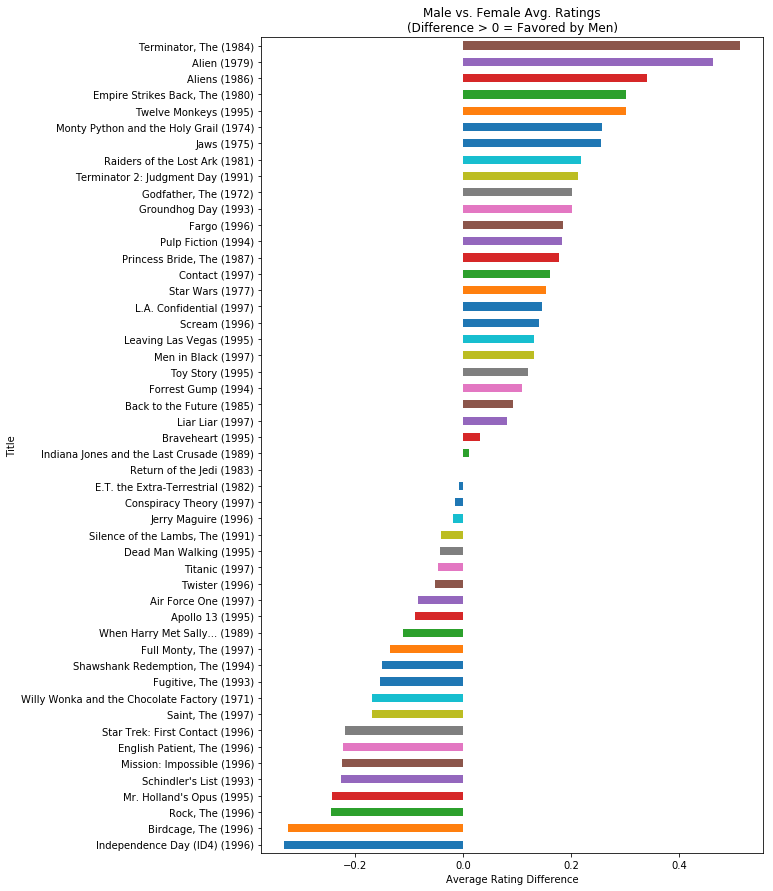

In [664]:
disagreements = pivoted[pivoted.movie_id.isin(most_50.index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');

Of course men like Terminator more than women. Independence Day though? Really?

In [624]:
result.f1_fake.value_counts().head(25)

0.00    574
0.65     98
0.71     95
0.64     74
0.69     71
0.59     71
0.76     63
0.75     62
0.73     57
0.57     54
0.72     53
0.68     51
0.56     49
0.74     49
0.53     47
0.02     47
0.67     47
0.55     47
0.54     47
0.62     46
0.77     44
0.05     44
0.66     44
0.58     43
0.08     42
Name: f1_fake, dtype: int64

### Plotting

### pandas has some nice integration with matplotlib
But if you want nice plots with frustration-free adjustments, I hear [seaborn](http://web.stanford.edu/~mwaskom/software/seaborn/) is fantastic. Matplotlib has a steep (and infinite) learning curve.

If you're interested in Python dataviz libraries, check out [Rob Story](https://twitter.com/oceankidbilly)'s talk [here](https://www.youtube.com/watch?v=kmy-sfm3cC8) [[slides](https://github.com/wrobstory/pydatasv2014)].

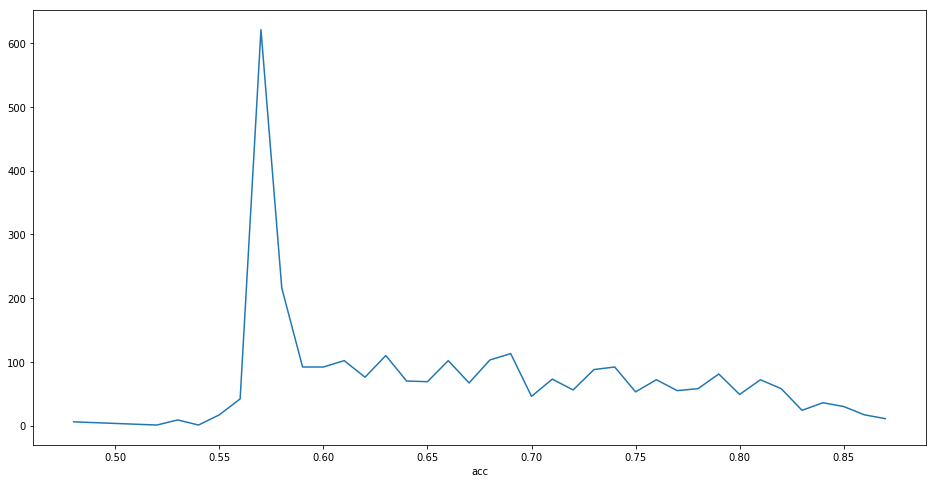

In [592]:
# number of trips started by starthour
result.groupby('acc').size().plot(figsize=(16,8))

#### Distribution of trip duration

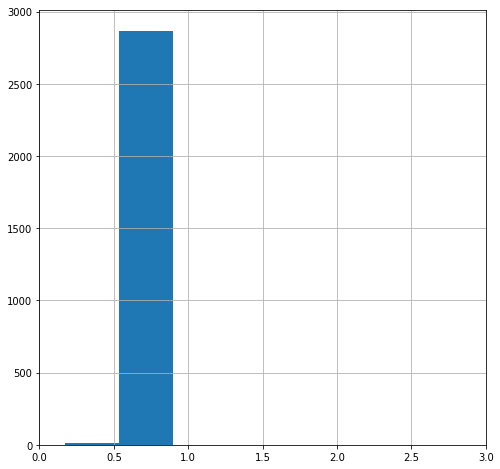

In [711]:
# distribution of tripduration
result.f1_real.hist(figsize=(8,8), bins=2)
plt.xlim(0, 3);

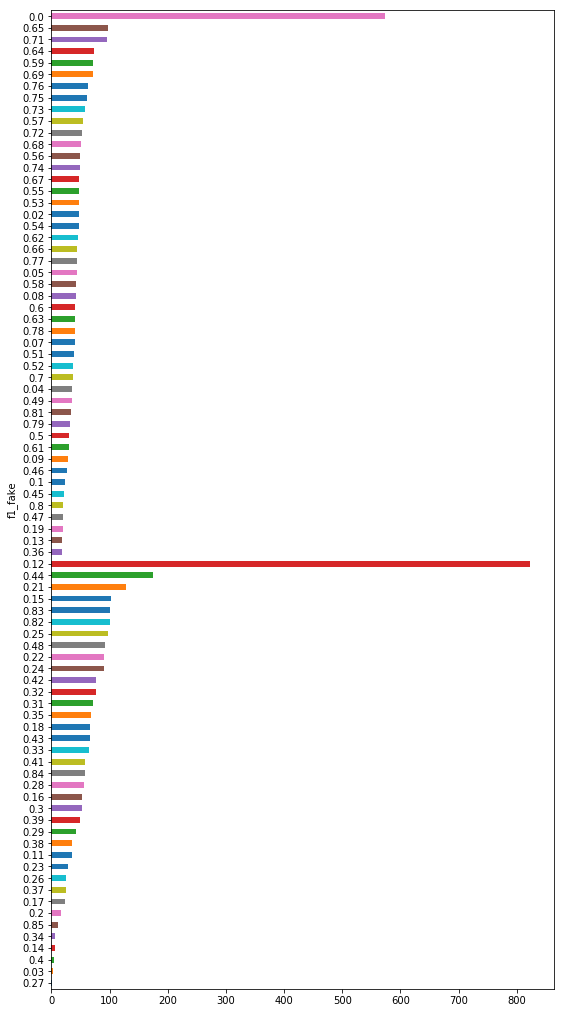

In [684]:
plt.figure(figsize=(9, 18))
result.groupby('f1_real').size().sort_values().plot(kind='barh')
result.groupby('f1_fake').size().sort_values().plot(kind='barh')